In [50]:
%matplotlib inline
from pathlib import Path

import sys

import qiime2
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# sys.path.append('/Users/alchemist/Aakash/Diet/gut_brain_project/pipeline_trail_version/dokdo/')
# import api
import statsmodels.api as sm
from scipy import stats
from tempfile import mkdtemp
from qiime2 import Artifact
from qiime2.plugins import demux, deblur, quality_filter, \
                          metadata, feature_table, alignment, \
                          phylogeny, diversity, emperor, feature_classifier, \
                          taxa, composition, dada2, vsearch, longitudinal, \
                          gneiss, songbird, aldex2, qurro, diversity_lib
from qiime2.plugins.diversity.pipelines import alpha,alpha_phylogenetic,beta,beta_phylogenetic

import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(style="whitegrid")

pd.options.display.max_seq_items = 2000

Before beginning this tutorial, create a new directory and change to that directory.  
**make sure to change the path in `workdir`**

Input the variables below: 

In [40]:
workdir = !pwd
workdir = str(Path(workdir[0]).parents[0])
workdir

'/Users/alchemist/Aakash/BonnGut/Microbiome_pipeline'

## Sample metadata

### read  metadata into `qiime2.Metadata` object

In [41]:
sample_metadata    = qiime2.Metadata.load(workdir+'/metadata/metadata.tsv')
sample_metadata_pd = sample_metadata.to_dataframe()
sample_metadata_pd.head()

,barcode-sequence,body-site,year,month,day,Person_ID,reported-antibiotic-usage,days-since-experiment-start
sample-id,,,,,,,,
L1S8,AGCTGACTAGTC,gut,2008.0,10.0,28.0,subject-1,Yes,0.0
L1S57,ACACACTATGGC,gut,2009.0,1.0,20.0,subject-1,No,84.0
L1S76,ACTACGTGTGGT,gut,2009.0,2.0,17.0,subject-1,No,112.0
L1S105,AGTGCGATGCGT,gut,2009.0,3.0,17.0,subject-1,No,140.0
L2S155,ACGATGCGACCA,left palm,2009.0,1.0,20.0,subject-1,No,84.0


## Loading Feature table

<visualization: Visualization uuid: db389eee-28f2-4ca7-8b78-16cc8b5ac4af>

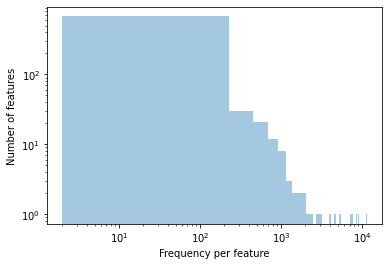

In [42]:
#
table                       = Artifact.load(workdir+'/feature_table/table.qza')
rep_seq                     = Artifact.load(workdir+'/rep_seq/rep_seq.qza')
phylogenic_tree_rooted_tree = Artifact.load(workdir+'/phylo_tree/rooted_tree.qza')
#
output_viz = feature_table.visualizers.summarize(table,sample_metadata) 
output_viz.visualization

# Import Alpha Diversity

In [43]:
# Choosing sampling depth
sampling_depth   =  5897
div_dir = workdir+'/diversity_analysis/sampling_depth_'+str(sampling_depth)+'/alpha_diversity.csv' #selecting directory
Path(str(workdir)+'/diversity_analysis/sampling_depth_'+str(sampling_depth)+'/plots').mkdir(parents=True, exist_ok=True)
#
alpha_diversity    = pd.read_csv(div_dir,index_col=0)
sample_metadata_pd = sample_metadata_pd[sample_metadata_pd.index.isin(alpha_diversity.index.values)]
sample_metadata_pd = sample_metadata_pd.join(alpha_diversity)
sample_metadata_pd

,barcode-sequence,body-site,year,month,day,Person_ID,reported-antibiotic-usage,days-since-experiment-start,observed_features,shannon,Faith
sample-id,,,,,,,,,,,
L1S8,AGCTGACTAGTC,gut,2008.0,10.0,28.0,subject-1,Yes,0.0,44,3.164969,5.056721
L1S57,ACACACTATGGC,gut,2009.0,1.0,20.0,subject-1,No,84.0,70,4.173306,6.520489
L1S76,ACTACGTGTGGT,gut,2009.0,2.0,17.0,subject-1,No,112.0,61,3.609216,6.427597
L1S105,AGTGCGATGCGT,gut,2009.0,3.0,17.0,subject-1,No,140.0,63,3.863914,7.032867
L1S140,ATGGCAGCTCTA,gut,2008.0,10.0,28.0,subject-2,Yes,0.0,65,3.839215,6.835858
L1S208,CTGAGATACGCG,gut,2009.0,1.0,20.0,subject-2,No,84.0,85,4.513080,8.341900
L1S257,CCGACTGAGATG,gut,2009.0,3.0,17.0,subject-2,No,140.0,81,4.708798,8.148245
L1S281,CCTCTCGTGATC,gut,2009.0,4.0,14.0,subject-2,No,168.0,72,4.608785,6.967094
L4S63,CTCGTGGAGTAG,right palm,2009.0,1.0,20.0,subject-2,No,84.0,228,6.181710,37.325668


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

gut v.s. right palm: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.671e-02 U_stat=0.000e+00
right palm v.s. tongue: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.426e-01 U_stat=9.000e+00
gut v.s. tongue: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.574e-01 U_stat=2.200e+01


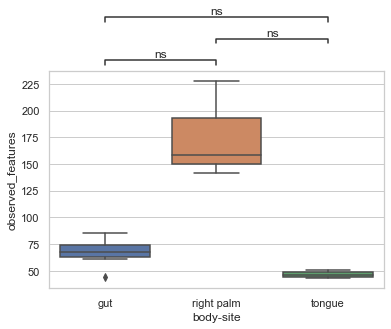

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

gut v.s. right palm: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.671e-02 U_stat=0.000e+00
right palm v.s. tongue: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.426e-01 U_stat=9.000e+00
gut v.s. tongue: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.847e-01 U_stat=1.800e+01


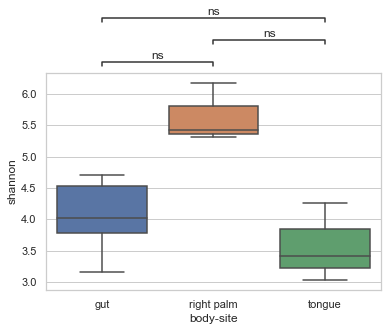

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

gut v.s. right palm: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.671e-02 U_stat=0.000e+00
right palm v.s. tongue: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.426e-01 U_stat=9.000e+00
gut v.s. tongue: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.100e+01


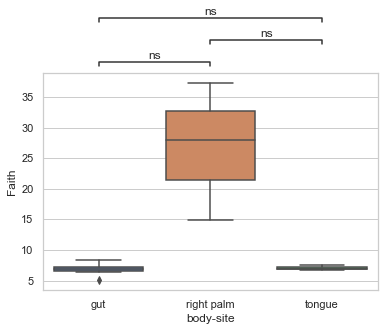

In [74]:
x         =  "body-site"
order     =   sample_metadata_pd[x].unique().tolist() #None
box_pairs =   list(zip(order, order[1:] + order[:1]))
for y in ['observed_features','shannon','Faith']:
    ax = sns.boxplot(data=sample_metadata_pd, x=x, y=y, order=order)
    test_results = add_stat_annotation(ax, data=sample_metadata_pd, x=x, y=y, order=order,
                                   box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)
    plt.savefig(str(workdir)+'/diversity_analysis/sampling_depth_'+str(sampling_depth)+'/plots/'+str(y)+'_'+str(x)+'diversity_plot.png', dpi=300, bbox_inches='tight')
    plt.show()